In [59]:
import numpy as np
import pandas as pd 

In [60]:
data = pd.read_csv("/Users/hoangthuyduongvu/Desktop/FuzzSIM/results/20250618-143315/choquet_mobius_results_dynamic_pos_gaussian.txt")

In [61]:
data

,index,mobius_value,capacity_value,label
0,0,0.309706,0.362933,0
1,1,0.010383,0.375056,0
2,2,0.046730,1.097825,0
3,3,0.009738,0.212813,0
4,4,0.318271,1.343460,0
...,...,...,...,...
145,145,0.393128,0.650412,2
146,146,0.433340,0.703879,2
147,147,0.466003,1.207554,2
148,148,0.000215,0.924467,2


In [62]:
mobius = data['mobius_value'].values
capacity = data['capacity_value'].values


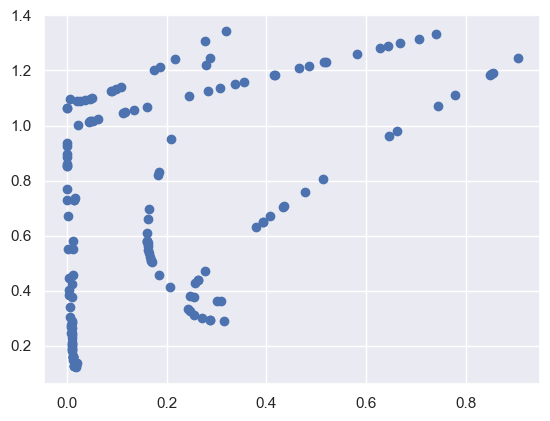

In [63]:
import matplotlib.pyplot as plt
plt.scatter(mobius, capacity)

In [64]:
# Import basic libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import time
from sklearn.preprocessing import LabelEncoder
import os
os.chdir("/Users/hoangthuyduongvu/Desktop/FuzzSIM")


In [65]:
# Import personalized libraries
from fuzz.src.capacity import *
from fuzz.choquet.choquet import *
from fuzz.src.norm import *
from fuzz.src.knn import KNNFuzz
from fuzz.src.sim import S1, S2, S3
from fuzz.optim import *
from fuzz.utils import *
from fuzz.eval import leave_one_out
from fuzz.dataloader import *
from fuzz.choquet.d_choquet import *

In [66]:
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['target'] = iris_data.target
data, labels = iris.iloc[:, :-1].values, iris.iloc[:, -1].values
data = batch_norm(np.array(data, dtype=np.float32))
data[:5]

array([[1.        , 0.67346936, 0.24489795, 0.        ],
       [1.        , 0.59574461, 0.25531912, 0.        ],
       [1.        , 0.66666669, 0.24444443, 0.        ],
       [1.        , 0.65909088, 0.29545453, 0.        ],
       [1.        , 0.70833325, 0.24999997, 0.        ]])

In [67]:
# To generate the choquet capacity from the enumerated data
mu=generate_capacity(enumerate_permute_unit(data[0]))
for i in range(5):
    choquet = Choquet(X=data[i], mu=mu, version='classic', p=1, q=1)
    print(f"Choquet capacity for data point {i}: {choquet.choquet}")

Choquet capacity for data point 0: 0.25816526652620986
Choquet capacity for data point 1: 0.2484857355399544
Choquet capacity for data point 2: 0.256610427963776
Choquet capacity for data point 3: 0.28157416246676503
Choquet capacity for data point 4: 0.26757328260533686


In [68]:
# Generate all possible mobius for training
features = list(range(len(data[0])))    # encode features as integers
mobius = generate_mobius(features, 2)

In [69]:
mob = []
for i in range(len(data)):
    choquet = Choquet(X=data[i], mu=mobius, version='linear', p=1, q=1)
    print(f"Choquet capacity for data point {i}: {choquet.choquet}")
    mob.append(choquet.choquet)

Choquet capacity for data point 0: 1.787171604724255
Choquet capacity for data point 1: 1.6844962719956027
Choquet capacity for data point 2: 1.7768939128818764
Choquet capacity for data point 3: 1.8141592211056572
Choquet capacity for data point 4: 1.8424715630006276
Choquet capacity for data point 5: 1.8398624538670774
Choquet capacity for data point 6: 1.8662070340998576
Choquet capacity for data point 7: 1.801846301633339
Choquet capacity for data point 8: 1.7814460375102992
Choquet capacity for data point 9: 1.7612210402660504
Choquet capacity for data point 10: 1.7914276598528818
Choquet capacity for data point 11: 1.875501467797613
Choquet capacity for data point 12: 1.7354188921547138
Choquet capacity for data point 13: 1.8053614950425865
Choquet capacity for data point 14: 1.7318420726354917
Choquet capacity for data point 15: 1.8694835768486913
Choquet capacity for data point 16: 1.7642170141542468
Choquet capacity for data point 17: 1.7624478308963454
Choquet capacity for da

In [70]:
mu = mobius_to_capacity(mobius, features, type_norm="basic")
cap = []
for i in range(len(data)):
    choquet = Choquet(X=data[i], mu=mu, version='d_choquet', p=1, q=1)
    print(f"Choquet capacity for data point {i}: {choquet.choquet}")
    cap.append(choquet.choquet)

Choquet capacity for data point 0: 1.6425713300704956
Choquet capacity for data point 1: 1.5574651956558228
Choquet capacity for data point 2: 1.6355091333389282
Choquet capacity for data point 3: 1.6130659580230713
Choquet capacity for data point 4: 1.677979588508606
Choquet capacity for data point 5: 1.6663411855697632
Choquet capacity for data point 6: 1.6896497011184692
Choquet capacity for data point 7: 1.6280412673950195
Choquet capacity for data point 8: 1.5986628532409668
Choquet capacity for data point 9: 1.578102946281433
Choquet capacity for data point 10: 1.6407126188278198
Choquet capacity for data point 11: 1.6491954326629639
Choquet capacity for data point 12: 1.5739340782165527
Choquet capacity for data point 13: 1.6624730825424194
Choquet capacity for data point 14: 1.666733980178833
Choquet capacity for data point 15: 1.7390220165252686
Choquet capacity for data point 16: 1.6889803409576416
Choquet capacity for data point 17: 1.639832615852356
Choquet capacity for dat

In [71]:
mob = np.array(mob)
cap = np.array(cap)

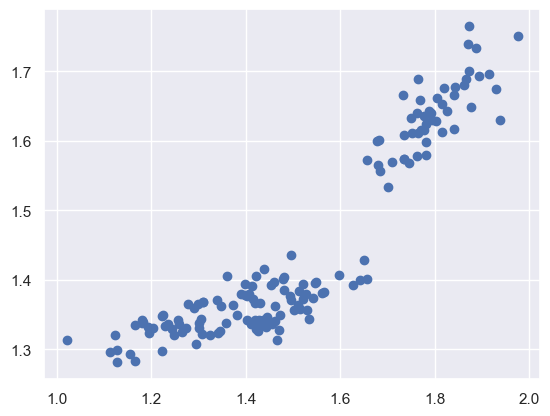

In [72]:
plt.scatter(mob, cap)